In [4]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn import feature_extraction
import codecs
import json
import os

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [5]:
IMPORT = True
EXPORT = True
DISPLAY = True
VERBOSE = False
DATA_DIR = "data/"
NARRATIVE_DIR = "data/pizza_request_dataset/narratives"
SEED = 221

In [6]:
def get_datasets(type='medium'):
    if type not in ['medium', 'all', 'mini']:
        raise Exception("Invalid type!")
    train_full, val_full = pd.read_csv(DATA_DIR + f'train_{type}.csv'), pd.read_csv(DATA_DIR + f'val_{type}.csv')
    train_request_text, train_y = train_full['request_text'], train_full['requester_received_pizza']
    val_request_text, val_y  = val_full['request_text'], val_full['requester_received_pizza']
    return train_request_text, train_y, val_request_text, val_y

In [7]:
train_request_text, train_y, val_request_text, val_y = get_datasets()

In [8]:
train_y.shape, val_y.shape

((330,), (110,))

In [38]:
def ngram_solver(train_request_text, train_y, val_request_text, test_y, ngram_size=1): 
    vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(ngram_size,ngram_size))
    vectorizer.fit(train_request_text) # build ngram dictionary
    train_features = vectorizer.transform(train_request_text) 
    val_features = vectorizer.transform(val_request_text)
    logreg = LogisticRegression()
    logreg.fit(train_features, train_y)
    y_pred = logreg.predict(val_features)
    
    score = accuracy_score(val_y,y_pred)
    return score
    

In [39]:
results = []
for i in range(1,16):
    result = ngram_solver(train_request_text, train_y, val_request_text, val_y, ngram_size=i)
    results.append(result)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [37]:
results

[0.7363636363636363,
 0.7636363636363637,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545,
 0.7545454545454545]

In [11]:
import matplotlib.pyplot as plt

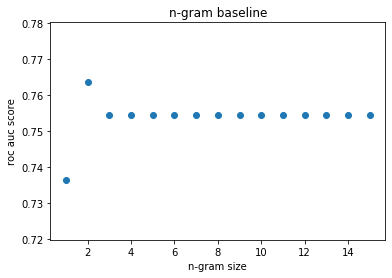

In [36]:
plt.scatter(range(1,16),results)
plt.ylabel('roc auc score')
plt.xlabel('n-gram size')
plt.title('n-gram baseline')
plt.savefig('ngrams.png')

In [14]:
ngram_solver(train_request_text, train_y, val_request_text, val_y, ngram_size=2)

ROC AUC score for 2-gram: 0.7636363636363637


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
ngram_solver(train_request_text, train_y, val_request_text, val_y, ngram_size=3)

ROC AUC score for 3-gram: 0.7545454545454545


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

def tfidf_solver(train_request_text, train_y, val_request_text, test_y): 
    tfidf_vectorizer=TfidfVectorizer(use_idf=True)
    fitted_vectorizer=tfidf_vectorizer.fit(train_request_text) 

    train_features =fitted_vectorizer.transform(train_request_text)
    val_features = fitted_vectorizer.transform(val_request_text)
    logreg = LogisticRegression()
    logreg.fit(train_features, train_y)
    y_pred = logreg.predict(val_features)
    
    score = (val_y,y_pred)
    return score

In [32]:


result = tfidf_solver(train_request_text, train_y, val_request_text, val_y)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
print (result)

0.5
